<a href="https://colab.research.google.com/github/mercyolat/HachTheHood-10-10/blob/main/MachineLearningWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This link may be useful as you work through this project: https://pytorch.org/docs/stable/index.html

We first need to install the required python packages and import modules as needed

In [ ]:
!pip install torch torchvision
# add others as needed

import torch
from torch import nn
from PIL import Image
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np



What are Tensors?

In [ ]:
shape = (3, 3)

# torch.rand(shape) creates a tensor with the given dimensions with random values between 0 and 1
rand_t = torch.rand(shape)

# get shape (dimensions) of tensor
print(rand_t.shape)

# get datatype of tensor
print(rand_t.dtype)

torch.Size([3, 3])
torch.float32


In [ ]:
# Load Dataset

training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 86368296.04it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73908293.97it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25153726.73it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11803301.59it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Let's take a look at our data and how we represent these images with tensors

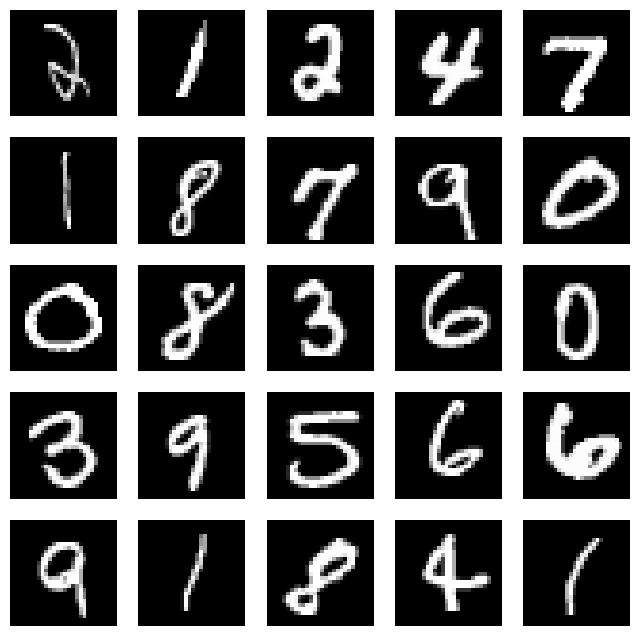

In [ ]:
# this code will display several random images from the MNIST dataset that we have loaded in

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Now let's see how these images are represented on our computer.

We will print off the first entry in our training data, which gives us a tuple. The first entry is the tensor representation of the image, and the second entry is the datapoint's class (aka label) which tells us what the computer should detect in the image.

In [ ]:
# print off the first entry in our training data
print(training_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

We can list out all of the classes (possible values) in our dataset.

In [ ]:
print(training_data.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Put the training and testing data into DataLoaders (for this model, the only parameters we need to specify here are batch_size=64 and shuffle=True)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = ...
test_dataloader = ...

We will now construct our neural network in PyTorch.

In [ ]:
# torch.nn contains all PyTorch functionality that is directly related to neural networks
from torch import nn

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # nn.Flatten() turns our (1x28x28) image tensor into one 784-dimensional vector, since neural nets take vectors as inputs
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # our first layer will take in 784 inputs and has 512 outputs
            nn.Linear(28*28, 512),
            # nn.ReLU() is what is known as an "activation function," ignore this for now as we will cover it later
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            # our final layer has 10 outputs, each corresponding to one of the possible classes (the output with the highest value is the class we predict)
            nn.Linear(512, 10),
        )

    def forward(self, x):
        """ this function is called when we pass input into our model, it returns the model's predictions"""
        x = self.flatten(x)  # flatten input image into a vector
        logits = self.linear_relu_stack(x)  # get the model's predictions
        return logits

We must instantiate the model.

In [ ]:
model = NeuralNetwork()

# we can print off the model to view information about it
print(model)

We will now define our loss function that we will use during the model's training.

In [ ]:
loss_function = ...

We will now define the optimizing algorithm that we will use during training.

In [ ]:
optimizer = ...

Training Loop (try and finish filling this out)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):

        # make predictions using X
        pred = ...

        # apply the loss function to compute the loss on the predictions
        loss = ...

        optimizer.zero_grad()

        # propagate the loss backwards and update parameters
        loss.backward()
        optimizer.step()

        # print output to show how far we've made it throught the loop
        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Testing Loop

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # create predictions for current batch
            pred = model(x)

            # compute the loss and add it to the total test_loss
            # note: the .item() method takes in a tensor with one element turns it into just a number
            test_loss += loss_fn(pred, y).item()

            # sum up the number of correct predictions in the batch and add to total number of correct predictions
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()


    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We now will train our model for 5 epochs.

In [ ]:
n_epochs = 5
for t in range(n_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    # call train and test functions
    ...

print("Done!")

We will now save our model so that we can reload anytime we want later.

In [ ]:
torch.save(model, "model.pth")